# Zadanie 2

## Generowanie rozkładu normalnego

Na listach zadań poznaliśmy kilka metod generowania rozkładu normalnego - nie są to jedyne metody znane i powszechnie używane metody. W pierwszym kroku sprawdź dotychczas zaimplementowane algorytmy, czy działają poprawnie. W drugim kroku, zaimplementuj dwie dodatkowe metody generowania rozkładu normalnego:

- metodę "tuzina" przykładowa implementacja w linku poniżej

- metodę zigguratu używając rozkładu wykładniczego. Przetestuj ile razy musimy obliczać funkcję wykładniczą dla różnych wyborów schodków.

Finalnie, porównaj efektywność generowania rozkładu normalnego za pomocą samodzielnie zaimplementowanych metod. Rozważ zarówno czas wykonania algorytmu, jak i dokładność symulacji. 


## Sprawdzenie poprawności działania algorytmów implementowanych w ramach list zadań

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple
from numpy.typing import NDArray
from scipy.stats import norm
from scipy.special import erfinv
from tqdm import tqdm
import time

### Metoda odwrotnej dystrybuanty

In [3]:
def normal_quantile(
        mu: float = 0, 
        sigma: float = 1, 
        n: int = 1
        ) -> NDArray:
    '''
        Generuje zmienną losową z rozkładu normalnego metodą odwrotnej dystrybuanty.

        Parametry:
        mu: wartość średnia (domyślnie mu = 0)
        sigma: odchylenie standardowe (domyślnie sigma = 1)
        n: liczba generowanych zmiennych (domyślnie n = 1)

        Zwraca:
        Wektor zmiennych losowych z rozkładu normalnego.
    '''
    u = np.random.uniform(0.001, 0.999, size=n)
    sigma = np.sqrt(sigma)
    F_ = mu + sigma * np.sqrt(2) * erfinv(2 * u - 1)
    return F_

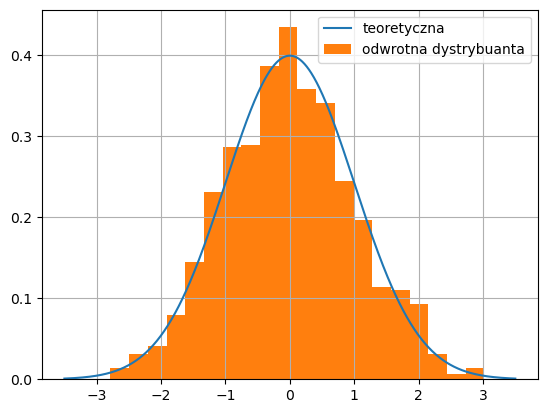

In [4]:
x = normal_quantile(n=1000)
t = np.linspace(-3.5,3.5,1000)
plt.plot(t, norm.pdf(t), label='teoretyczna')
plt.hist(x, bins=20, density=True, label='odwrotna dystrybuanta')
plt.grid(True)
plt.legend()
plt.show()

### Metoda akceptacji-odrzucenia

In [23]:
def normal_acc_rej(
        n: int
        ) -> list[float]:
    '''
        Generuje zmienną losową z rozkładu normalnego standardowego metodą akceptacji-odrzucenia.

        n: liczba generowanych zmiennych (domyślnie n = 1)

        Zwraca:
        Wektor zmiennych losowych z rozkładu normalnego.
        '''
    samples = np.zeros(n)
    i = 0
    while len(samples) < n:
        x = np.random.uniform(-100, 100)
        y = np.random.uniform(0, 2)
        if y <= np.exp(-0.5 * x**2):
            samples[i] = x
            i += 1
    return samples

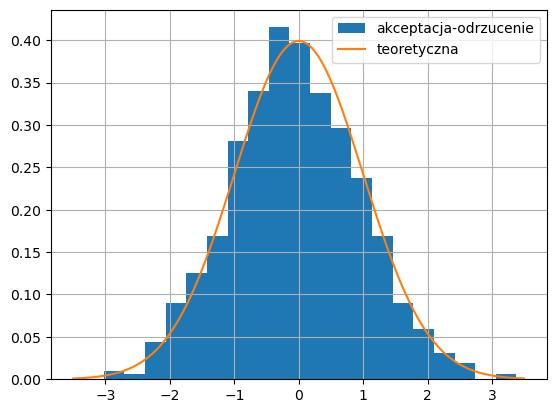

In [6]:
values = normal_acc_rej(1000)
v = np.linspace(-3.5,3.5,1000)
plt.hist(values, density=True, bins=20, label='akceptacja-odrzucenie')
plt.plot(v, norm.pdf(v), label='teoretyczna')
plt.legend()
plt.grid(True)
plt.show()

### Metoda Boxa-Mullera i Marsaglii

In [7]:
def box_muller(
        mi: float = 0, 
        sig: float = 1
        ) -> Tuple[float, float]:
    '''
        Generuje dwie niezależne zminne losowe z rozkładu normalnego za pomocą algorytmu Boxa-Mullera.
        
        Parametry:
        mi: wartość średnia rozkładu (domyślnie mi = 0)
        sig: odchylenie standardowe (domyślnie sig = 1)
        
        Zwraca:
        Para liczb z rozkładu normalnego.'''
    u1, u2 = np.random.uniform(size=2)
    x = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    y = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return (mi + sig * x, mi + sig * y)

In [8]:
def gen_box_muller(
        mi: float = 0, 
        sig: float = 1, 
        n: int =2
        ) -> NDArray:
    '''
        Generator zmiennych losowych z rozkładu normlanego.
        
        Parametry:
        mi: wartość średnia rozkładu (domyślnie mi = 0)
        sig: odchylenie standardowe (domyślnie sig = 1)
        n: ilość generowanych zmiennych (domyślnie n = 2)
        
        Zwraca:
        Wektor zmiennych losowych.
        '''
    X = np.zeros(n)
    if n % 2 == 0:
        for i in range(0, n, 2):
            X[i], X[i + 1] = box_muller(mi, sig)
    else:
        for i in range(0, n - 1, 2):
            X[i], X[i + 1] = box_muller(mi, sig)
        X[-1] = box_muller(mi, sig)[0]
    return X

In [9]:
def marsaglia(
        mi: float = 0,
        sig: float = 1
        ) -> Tuple[float, float]:
    '''
        Generuje dwie niezależne zminne losowe z rozkładu normalnego za pomocą algorytmu Marsaglii.
        
        Parametry:
        mi: wartość średnia rozkładu (domyślnie mi = 0)
        sig: odchylenie standardowe (domyślnie sig = 1)
        
        Zwraca:
        Para liczb z rozkładu normalnego.
    '''
    v1, v2 = np.random.uniform(-1, 1, size=2)
    r = v1**2 + v2**2
    while r > 1:
        v1, v2 = np.random.uniform(-1, 1, size=2)
        r = v1**2 + v2**2
    x = np.sqrt((-2 * np.log(r)) / r) * v1
    y = np.sqrt((-2 * np.log(r)) / r) * v2
    return (mi + sig * x, mi + sig * y)

In [10]:
def gen_marsaglia(
        mi: float = 0, 
        sig: float = 1, 
        n: int =2
        ) -> NDArray:
    '''Generator zmiennych losowych z rozkładu normlanego.
        
        Parametry:
        mi: wartość średnia rozkładu (domyślnie mi = 0)
        sig: odchylenie standardowe (domyślnie sig = 1)
        n: ilość generowanych zmiennych (domyślnie n = 2)
        
        Zwraca:
        Wektor zmiennych losowych.
        '''
    X = np.zeros(n)
    if n % 2 == 0:
        for i in range(0, n, 2):
            X[i], X[i + 1] = marsaglia(mi, sig)
    else:
        for i in range(0, n - 1, 2):
            X[i], X[i + 1] = marsaglia(mi, sig)
        X[-1] = marsaglia(mi, sig)[0]
    return X

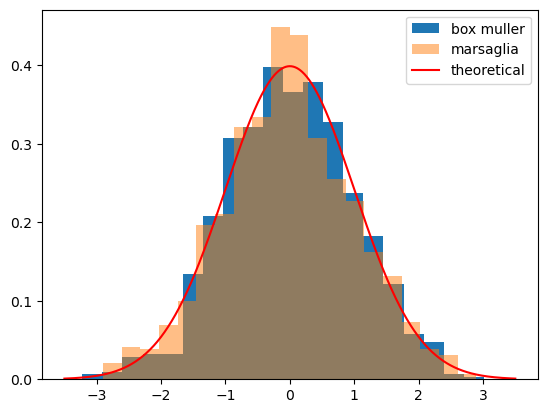

In [11]:
test_1 = gen_box_muller(0,1,1000)
test_2 = gen_marsaglia(0,1,1000)

x = np.linspace(-3.5,3.5,1000)
theoretical = (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)
plt.hist(test_1, bins=20, label='box muller', density=True)
plt.hist(test_2, bins=20, alpha=0.5, label='marsaglia', density=True)
plt.plot(x, theoretical, color='red', label='theoretical')
plt.legend()
plt.show()

## Implementacja algorytmu "tuzina"

In [12]:
def tuzin(
        mu: float = 0,
        sig: float = 1, 
        n: int = 1
        ) -> NDArray:
    '''
        Generator zmiennych losowych z rozkładu normalnego metodą "tuzina"

        Parametry:
        mi: wartość średnia rozkładu (domyślnie mi = 0)
        sig: odchylenie standardowe (domyślnie sig = 1)
        n: ilość generowanych zmiennych (domyślnie n = 1)
        
        Zwraca:
        Wektor zmiennych losowych.
        '''
    Y = np.zeros(n)
    for i in range(n):
        U = np.random.uniform(size=12)
        S = np.sum(U)
        x = S - 6
        y = sig * x + mu
        Y[i] = y
    return Y

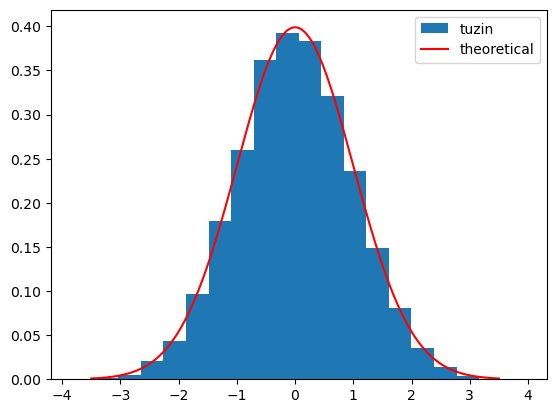

In [13]:
test_3 = tuzin(0,1,10000)

x = np.linspace(-3.5,3.5,1000)
theoretical = (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)

plt.hist(test_3, bins=20, label='tuzin', density=True)
plt.plot(x, theoretical, color='red', label='theoretical')
plt.legend()
plt.show()

## Implementacja algorytmu ziggurat

### Generowanie tabeli podziału obszaru pod wykresem funkcji gęstości

In [33]:
def tables(
        n_layers: int = 256
        ) -> Tuple[NDArray, NDArray]:
    '''
        Generuje podział na prostokądy obszaru pod wykresem funkcji gęstości rozkładu normalnego standardowego.
        
        Parametry:
        n_layers: liczba prostokątów (domyślnie n_layers = 256)
        
        Zwraca:
        x: wartości punktów brzegowych prostokątów na osi x
        y: wartości punktów brzegowych prostokątów na osi y
        '''

    f = norm.pdf

    x = np.zeros(n_layers+1)
    y = np.zeros(n_layers+1)
    
    A = 1 / n_layers

    x[0] = 3.442619855899
    y[0] = f(x[0])
    
    for i in range(1, n_layers):
        y[i] = y[i - 1] + A / x[i - 1]
        x[i] = np.sqrt(-2 * np.log(y[i] * np.sqrt(2 * np.pi)))

    y[n_layers] = f(0)
    x[n_layers] = 0

    return x, y

<class 'tuple'>


C:\Users\julka\AppData\Local\Temp\ipykernel_5356\727186216.py:17: RuntimeWarning: invalid value encountered in sqrt
  x[i] = np.sqrt(-2 * np.log(y[i] * np.sqrt(2 * np.pi)))


### Generowanie pojedynczej wartości z rozkładu normalnego

In [35]:
def ziggurat(
        x: NDArray, 
        y: NDArray, 
        n_layers: float = 256
        ) -> Tuple[float, int]: 
    '''
        Generuje zmienną losową z rozkładu normalnego standardowego za pomocą metody ziggurat.
        
        Parametry:
        x: wartości punktów brzegowych prostokątów na osi x
        y: wartości punktów brzegowych prostokątów na osi y
        n_layers: liczba prostokątów (domyślnie n_layers = 256)
        
        Zwraca:
        x_val: zmienna losowa z rozkładu normalnego standardowego
        count_exp: liczba użyć agorytmu ogonowego
        '''
    count_exp = 0
    while True:

        i = np.random.randint(0, n_layers)

        U0 = np.random.uniform(-1,1)
        x_val = U0 * x[i]
        
        if x_val < x[i + 1]:
            return x_val, count_exp
        
        if i == 0:
            count_exp += 1
            return sample_tail(x[0]), count_exp

        U1 = np.random.rand()
        y_val = y[i] + U1 * (y[i + 1] - y[i])
        
        if y_val < norm.pdf(x_val):
            return x_val, count_exp

### Metoda dla ogonów

In [38]:
def sample_tail(
        x1: float
        ) -> float:
    '''
        Funkcja służąca do obsługi ogonów rozkładu normalnego w metodzie ziggurat.
        
        Parametry:
        x1: wartość do sprawdzenia
        
        Zwraca:
        Wartość zmiennej losowej leżącej w ogonie rozkładu normalnego.
        '''

    while True:
        U1 = np.random.rand()
        U2 = np.random.rand()
        x_tail = -np.log(U1) / x1
        y_tail = -np.log(U2)
        
        if 2 * y_tail > x_tail ** 2:
            return x_tail + x1


### Generowanie zmiennych losowych

C:\Users\julka\AppData\Local\Temp\ipykernel_5356\631708476.py:15: RuntimeWarning: invalid value encountered in sqrt
  x[i] = np.sqrt(-2 * np.log(y[i] * np.sqrt(2 * np.pi)))


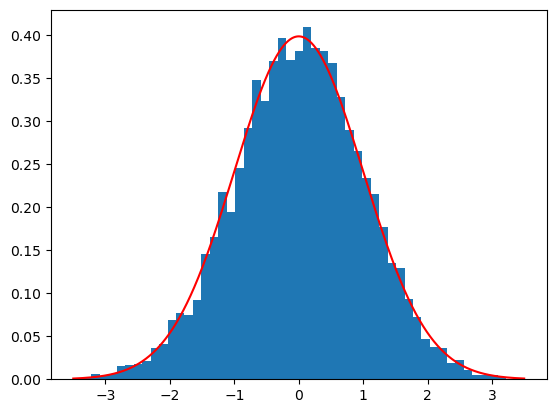

In [17]:
x, y = tables()
n_samples = 10000
samples = [ziggurat(x, y)[0] for _ in range(n_samples)]

t = np.linspace(-3.5,3.5,1000)
theoretical = norm.pdf(t)
plt.plot(t, theoretical, color='red', label='theoretical')
plt.hist(samples, bins=50, density=True)
plt.show()

### Liczba obliczeń funkcji wykładniczej

C:\Users\julka\AppData\Local\Temp\ipykernel_5356\631708476.py:15: RuntimeWarning: invalid value encountered in sqrt
  x[i] = np.sqrt(-2 * np.log(y[i] * np.sqrt(2 * np.pi)))


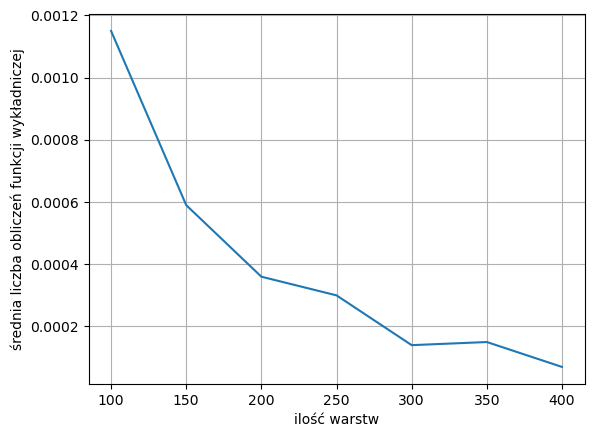

In [18]:
ns_layers = [100,150,200,250,300,350,400]
counts = np.zeros(len(ns_layers))
for i in range(len(ns_layers)):
    x, y = tables(ns_layers[i])
    counter = 0
    for m in range(100000):
        counter += ziggurat(x,y,n_layers=ns_layers[i])[1]
    counts[i] = counter/100000

plt.plot(ns_layers, counts)
plt.xlabel('ilość warstw')
plt.ylabel('średnia liczba obliczeń funkcji wykładniczej')
plt.grid(True)
plt.show()

## Porównanie metod generowania zmiennych z rozkładu normalnego.

  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\julka\AppData\Local\Temp\ipykernel_5356\631708476.py:15: RuntimeWarning: invalid value encountered in sqrt
  x[i] = np.sqrt(-2 * np.log(y[i] * np.sqrt(2 * np.pi)))
100%|██████████| 6/6 [01:37<00:00, 16.22s/it]


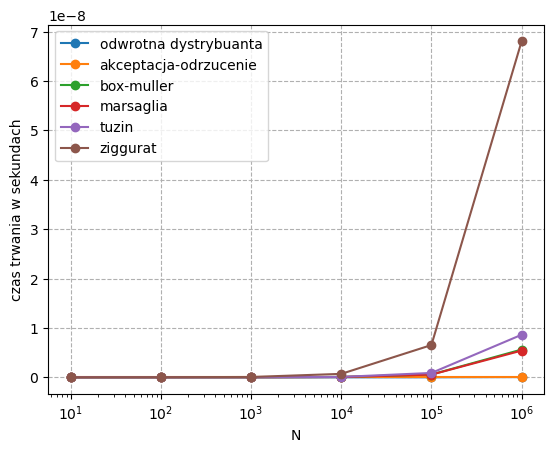

In [30]:
Ns = [10,100,1000,10000,100000,1000000]

times_quantile = []
times_acc_rej = []
times_box_muller = []
times_marsaglia = []
times_tuzin = []
times_ziggurat = []

for N in tqdm(Ns):

    s = time.time()
    normal_quantile(n=N)
    f = time.time()
    times_quantile.append((f-s)*10**(-9))

    s = time.time()
    normal_acc_rej(n=N)
    f = time.time()
    times_acc_rej.append((f-s)*10**(-9))

    s = time.time()
    gen_box_muller(n=N)
    f = time.time()
    times_box_muller.append((f-s)*10**(-9))

    s = time.time()
    gen_marsaglia(n=N)
    f = time.time()
    times_marsaglia.append((f-s)*10**(-9))

    s = time.time()
    tuzin(n=N)
    f = time.time()
    times_tuzin.append((f-s)*10**(-9))

    s = time.time()
    x,y = tables()
    [ziggurat(x, y) for _ in range(N)]
    f = time.time()
    times_ziggurat.append((f-s)*10**(-9))

plt.plot(Ns, times_quantile, label='odwrotna dystrybuanta', marker='o')
plt.plot(Ns, times_acc_rej, label='akceptacja-odrzucenie', marker='o')
plt.plot(Ns, times_box_muller, label='box-muller', marker='o')
plt.plot(Ns, times_marsaglia, label='marsaglia', marker='o')
plt.plot(Ns, times_tuzin, label='tuzin', marker='o')
plt.plot(Ns, times_ziggurat, label='ziggurat', marker='o')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('czas trwania w sekundach')
plt.grid(linestyle='--')
plt.legend()
plt.show()